# Median-normalization of the proteome raw numbers ([DESeq2 method](https://scienceparkstudygroup.github.io/research-data-management-lesson/median_of_ratios_manual_normalization/index.html))

In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'
from IPython.display import display
import pandas as pd
import numpy as np

In [2]:
PT_count = pd.read_excel(f'{Project}/Results/Tables/Proteome/adi_proteome_3-2.xlsx').drop(columns=['Description','Ref.1','Ref.2'])
PT_count = PT_count.rename(columns={'Uniprot' : 'uniprot_id',
                        '04_day0' : 'PT0a',
                        '07_day0' : 'PT0b',
                        '10_day0' : 'PT0c',
                        '05_day4' : 'PT4a',
                        '08_day4' : 'PT4b',
                        '11_day4' : 'PT4c',
                        '06_day8' : 'PT8a',
                        '09_day8' : 'PT8b',
                        '12_day8' : 'PT8c'})

display(PT_count)

,uniprot_id,PT0a,PT0b,PT0c,PT4a,PT4b,PT4c,PT8a,PT8b,PT8c
0,Q9CR37,1.693290e+05,1.496630e+05,1.490909e+05,1.844660e+05,2.016059e+05,1.814890e+05,2.889049e+05,2.936150e+05,2.015100e+05
1,P54869,3.281019e+05,4.591652e+05,3.856480e+05,2.066622e+06,1.415515e+06,2.458471e+06,7.100138e+05,9.828228e+05,8.119442e+05
2,Q99M31,6.523043e+06,6.982720e+06,6.368034e+06,6.381714e+06,7.662582e+06,6.510318e+06,6.107200e+06,6.328169e+06,5.523205e+06
3,Q7TSS2,4.173766e+06,4.451297e+06,4.538361e+06,2.128894e+06,3.956585e+06,2.258005e+06,2.224830e+06,2.202816e+06,1.971017e+06
4,Q71FD5,4.581468e+05,4.790679e+05,4.351729e+05,6.583832e+05,6.367181e+05,6.612349e+05,7.045228e+05,7.042540e+05,6.369008e+05
...,...,...,...,...,...,...,...,...,...,...
5392,Q9JJ00,2.687962e+06,2.877811e+06,2.996009e+06,6.077719e+05,1.380807e+06,8.615510e+05,8.188600e+05,6.809649e+05,8.419740e+05
5393,Q99LL5,2.003621e+06,2.255631e+06,2.181153e+06,1.310549e+06,2.054065e+06,1.460465e+06,1.009178e+06,1.040777e+06,1.030952e+06
5394,P70441,7.526243e+06,7.909776e+06,7.718007e+06,3.334555e+06,6.667487e+06,4.105355e+06,4.330949e+06,4.373483e+06,4.174260e+06
5395,Q9Z2U0,5.487924e+07,4.858728e+07,5.781606e+07,4.250175e+07,6.408436e+07,4.274319e+07,5.249991e+07,5.582863e+07,5.144550e+07


In [3]:
PT_count_tmp = PT_count.copy()
PT_count_tmp.iloc[:,1:] = np.log(PT_count_tmp.iloc[:,1:])
PT_count_tmp = PT_count_tmp.replace(-np.inf, np.nan).dropna()
PT_count_tmp['pseudo_reference'] = PT_count_tmp.iloc[:,1:].mean(axis=1)
for SP in PT_count_tmp.iloc[:,1:10]:
    PT_count_tmp[SP] = PT_count_tmp[SP] - PT_count_tmp['pseudo_reference']
PT_count_tmp = PT_count_tmp.drop(columns='pseudo_reference')
PT_scaling_factor = [np.exp(i) for i in PT_count_tmp.iloc[:,1:].median().tolist()]

display(PT_scaling_factor)

[1.017828535127577,
 1.0733097835341359,
 1.0503369639019713,
 0.9500208156461549,
 1.192722365272666,
 0.9911403567064004,
 0.9216088818173025,
 0.9468790107603249,
 0.8783648168023466]

In [4]:
PT_Ncount = PT_count.copy()
for SP, SF in zip(PT_Ncount.iloc[:,1:], PT_scaling_factor):
    PT_Ncount[SP] = PT_Ncount[SP] / SF

display(PT_Ncount)

,uniprot_id,PT0a,PT0b,PT0c,PT4a,PT4b,PT4c,PT8a,PT8b,PT8c
0,Q9CR37,1.663630e+05,1.394407e+05,1.419458e+05,1.941705e+05,1.690301e+05,1.831113e+05,3.134788e+05,3.100872e+05,2.294150e+05
1,P54869,3.223548e+05,4.278031e+05,3.671660e+05,2.175344e+06,1.186793e+06,2.480446e+06,7.704069e+05,1.037960e+06,9.243815e+05
2,Q99M31,6.408784e+06,6.505782e+06,6.062849e+06,6.717447e+06,6.424447e+06,6.568513e+06,6.626672e+06,6.683186e+06,6.288053e+06
3,Q7TSS2,4.100657e+06,4.147262e+06,4.320862e+06,2.240892e+06,3.317272e+06,2.278189e+06,2.414072e+06,2.326397e+06,2.243962e+06
4,Q71FD5,4.501218e+05,4.463464e+05,4.143174e+05,6.930197e+05,5.338360e+05,6.671456e+05,7.644488e+05,7.437635e+05,7.250983e+05
...,...,...,...,...,...,...,...,...,...,...
5392,Q9JJ00,2.640879e+06,2.681249e+06,2.852426e+06,6.397459e+05,1.157694e+06,8.692523e+05,8.885114e+05,7.191678e+05,9.585698e+05
5393,Q99LL5,1.968525e+06,2.101565e+06,2.076622e+06,1.379495e+06,1.722165e+06,1.473520e+06,1.095018e+06,1.099166e+06,1.173717e+06
5394,P70441,7.394412e+06,7.369518e+06,7.348125e+06,3.509981e+06,5.590142e+06,4.142052e+06,4.699335e+06,4.618841e+06,4.752307e+06
5395,Q9Z2U0,5.391796e+07,4.526865e+07,5.504525e+07,4.473770e+07,5.372948e+07,4.312527e+07,5.696550e+07,5.896068e+07,5.856962e+07


# FC calculation

In [5]:
# FC
Conds = ['4','8']
reps = ['a','b','c']

PT_FC = pd.DataFrame()
PT_FC['uniprot_id'] = PT_Ncount['uniprot_id']
for Cond in Conds:
    for rep in reps:
        PT_FC['PT'+Cond+rep] = PT_Ncount['PT'+Cond+rep] / PT_Ncount['PT0'+rep]

display(PT_FC)

,uniprot_id,PT4a,PT4b,PT4c,PT8a,PT8b,PT8c
0,Q9CR37,1.167150,1.212201,1.290009,1.884306,2.223793,1.616215
1,P54869,6.748292,2.774158,6.755654,2.389935,2.426257,2.517612
2,Q99M31,1.048162,0.987498,1.083404,1.033998,1.027269,1.037145
3,Q7TSS2,0.546471,0.799870,0.527253,0.588704,0.560948,0.519332
4,Q71FD5,1.539627,1.196013,1.610228,1.698315,1.666337,1.750103
...,...,...,...,...,...,...,...
5392,Q9JJ00,0.242247,0.431774,0.304741,0.336445,0.268221,0.336054
5393,Q99LL5,0.700776,0.819468,0.709575,0.556263,0.523023,0.565205
5394,P70441,0.474680,0.758549,0.563688,0.635525,0.626749,0.646737
5395,Q9Z2U0,0.829737,1.186903,0.783451,1.056522,1.302462,1.064027


In [6]:
# logFC
PT_logFC = PT_FC.copy()
PT_logFC.iloc[:,1:] = np.log2(PT_FC.iloc[:,1:])

display(PT_logFC)

,uniprot_id,PT4a,PT4b,PT4c,PT8a,PT8b,PT8c
0,Q9CR37,0.222990,0.277628,0.367381,0.914034,1.153022,0.692619
1,P54869,2.754522,1.472050,2.756096,1.256971,1.278733,1.332056
2,Q99M31,0.067862,-0.018150,0.115571,0.048234,0.038814,0.052618
3,Q7TSS2,-0.871782,-0.322162,-0.923432,-0.764387,-0.834062,-0.945271
4,Q71FD5,0.622581,0.258233,0.687265,0.764104,0.736680,0.807440
...,...,...,...,...,...,...,...
5392,Q9JJ00,-2.045448,-1.211652,-1.714343,-1.571556,-1.898505,-1.573234
5393,Q99LL5,-0.512974,-0.287241,-0.494972,-0.846161,-0.935055,-0.823153
5394,P70441,-1.074972,-0.398685,-0.827031,-0.653979,-0.674040,-0.628748
5395,Q9Z2U0,-0.269275,0.247202,-0.352085,0.079323,0.381241,0.089534


In [7]:
# avg logFC
Conds = ['4','8']
reps = ['a','b','c']

PT_avg_logFC = pd.DataFrame()
PT_avg_logFC['uniprot_id'] = PT_logFC['uniprot_id']
for Cond in Conds:
    PT_avg_logFC['PT'+Cond] = PT_logFC[['PT'+Cond+rep for rep in reps]].mean(axis=1)

display(PT_avg_logFC)

,uniprot_id,PT4,PT8
0,Q9CR37,0.289333,0.919892
1,P54869,2.327556,1.289253
2,Q99M31,0.055094,0.046555
3,Q7TSS2,-0.705792,-0.847907
4,Q71FD5,0.522693,0.769408
...,...,...,...
5392,Q9JJ00,-1.657147,-1.681098
5393,Q99LL5,-0.431729,-0.868123
5394,P70441,-0.766896,-0.652255
5395,Q9Z2U0,-0.124719,0.183366


# Save the results

In [8]:
PT_Ncount.to_csv('adi_PT_Ncount.tsv', sep='\t', index=False)
PT_FC.to_csv('adi_PT_FC.tsv', sep='\t', index=False)
PT_logFC.to_csv('adi_PT_log2FC.tsv', sep='\t', index=False)
PT_avg_logFC.to_csv('adi_PT_avg_log2FC.tsv', index=False, sep='\t')

# Checking

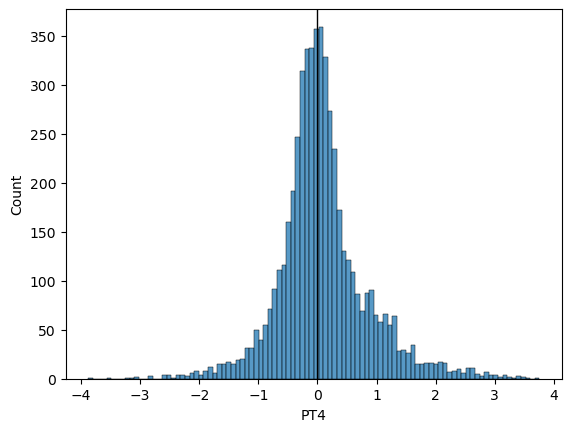

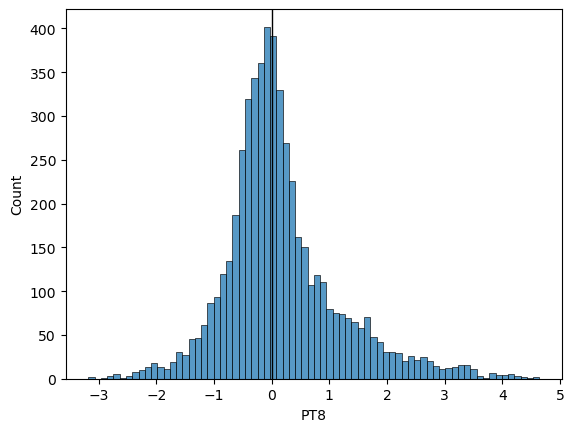

<Figure size 640x480 with 0 Axes>

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot( PT_avg_logFC["PT4"] )
plt.axvline(0, c='k', lw=1)
plt.show()
plt.clf()

sns.histplot( PT_avg_logFC["PT8"] )
plt.axvline(0, c='k', lw=1)
plt.show()
plt.clf()

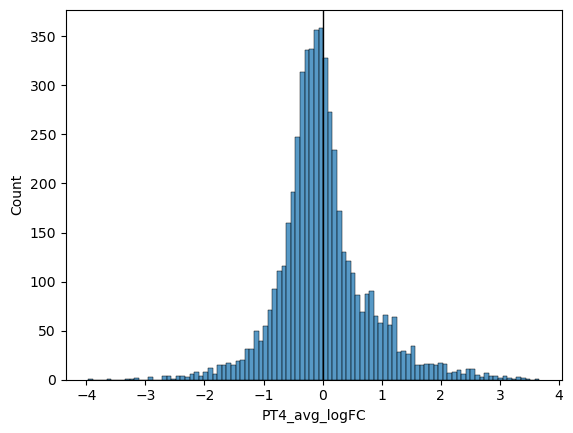

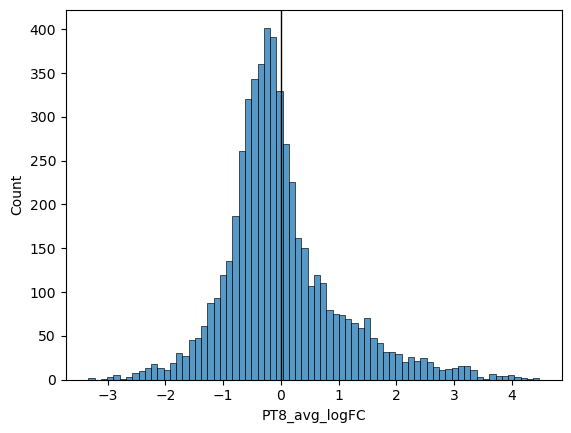

<Figure size 640x480 with 0 Axes>

In [10]:
tmp = pd.read_excel(f'{Project}/Results/Tables/Proteome/adi_proteome.xlsx')[['PT4_avg_logFC','PT8_avg_logFC']]

sns.histplot( tmp["PT4_avg_logFC"] )
plt.axvline(0, c='k', lw=1)
plt.show()
plt.clf()

sns.histplot( tmp["PT8_avg_logFC"] )
plt.axvline(0, c='k', lw=1)
plt.show()
plt.clf()